## Bloom Filter
start with importing essential packages: hashlib for creating hash functions, random for generating random values, time for measuring performance metrics, and matplotlib.pyplot for plotting results. These libraries are fundamental for implementing the Bloom filter, enabling efficient hashing, randomness for testing, timing for performance evaluation, and visualization of the results.

In [1]:
#import all the required packages
import hashlib
import random
import time
import matplotlib.pyplot as plt

### BloomFilter class
Next defines the BloomFilter class, which initializes with a specified size and number of hash functions. It includes methods for generating multiple hash values using double hashing, adding items to the filter by setting bits at hash values, and checking for item presence by verifying all relevant bits are set. 

In [2]:
class BloomFilter:
    def __init__(self, size, num_hashes):
        """Initialize the Bloom filter with a specified size and number of hash functions."""
        self.size = size  # The size of the bit array
        self.num_hashes = num_hashes  # The number of hash functions to use
        self.bit_array = [0] * size  # Initialize the bit array with zeros

    def _hashes(self, item):
        """Generate multiple hash values for a given item using double hashing."""
        hash1 = int(hashlib.md5(str(item).encode()).hexdigest(), 16)
        hash2 = int(hashlib.sha256(str(item).encode()).hexdigest(), 16)
        for i in range(self.num_hashes):
            yield (hash1 + i * hash2) % self.size  # Yield a hash value for each function

    def add(self, item):
        """Add an item to the Bloom filter."""
        for hash_val in self._hashes(item):
            self.bit_array[hash_val] = 1  # Set the bits at the hash values to 1

    def contains(self, item):
        """Check if an item is in the Bloom filter."""
        return all(self.bit_array[hash_val] for hash_val in self._hashes(item))  # Check all bits are set

### Reading word files
Then defines the read_words_from_file function, which reads words from a specified file, assuming one word per line, and returns them as a list. This function is crucial for loading test data into the Bloom filter, facilitating performance testing and analysis. By stripping whitespace and ignoring empty lines, it ensures clean and accurate input data, ready for subsequent operations. This utility function simplifies data preparation, making it easier to work with different datasets for Bloom filter evaluation.

In [3]:
def read_words_from_file(file_path):
    """Read words from a file, assuming one word per line."""
    with open(file_path, 'r') as file:
        words = [line.strip() for line in file.readlines() if line.strip()]
    return words  # Return a list of words

### Calculating False Postive Rate
Defines the calculate_false_positive_rate function, which calculates the Bloom filter's false positive rate by testing random words not present in the given word list. It generates random words, checks their presence in the Bloom filter, and counts false positives. This function is essential for assessing the accuracy of the Bloom filter, providing a critical performance metric that indicates how often the filter incorrectly identifies non-present items as present. The false positive rate is a key indicator of the filter's reliability and effectiveness.

In [4]:
def calculate_false_positive_rate(bf, samples, words):
    """Calculate the false positive rate of the Bloom filter."""
    false_positives = 0
    tested_samples = 0
    while tested_samples < samples:
        random_word = ''.join(random.choices('abcdefghijklmnopqrstuvwxyz', k=10))
        if random_word not in words:
            tested_samples += 1
            if bf.contains(random_word):
                false_positives += 1
    return false_positives / samples  # Return the false positive rate

### MEasure Performance
Defines the measure_performance function, which measures the time taken to add and check items in the Bloom filter at various intervals. It initializes the Bloom filter, measures the time to add words and check their presence, and stores these times for different input sizes. This function helps analyze the Bloom filter's performance in terms of time efficiency, providing insights into its scalability and speed. By evaluating performance at different scales, it identifies how the filter handles increasing data volumes.

In [5]:
def measure_performance(words, size, num_hashes):
    """Measure the time it takes to add and check items in the Bloom filter."""
    add_times = []
    check_times = []
    intervals = range(100, len(words) + 1, 100)
    
    for i in intervals:
        bf = BloomFilter(size=size, num_hashes=num_hashes)  # Re-initialize Bloom filter for each interval

        # Measure add time
        start_time = time.time()
        for word in words[:i]:
            bf.add(word)
        add_times.append(time.time() - start_time)

        # Measure check time
        start_time = time.time()
        for word in words[:i]:
            bf.contains(word)
        check_times.append(time.time() - start_time)
        
    return intervals, add_times, check_times  # Return the times and intervals

### Compare false positve with size
Defines the analyze_false_positive_rate_vs_size function, which examines how the false positive rate varies with different Bloom filter sizes. It initializes Bloom filters of varying sizes, adds words, and calculates the false positive rate for each size. This function explores the relationship between filter size and accuracy, helping to determine the optimal size for a given application.

In [6]:
def analyze_false_positive_rate_vs_size(words, sizes, num_hashes):
    """Analyze false positive rate as a function of Bloom filter size."""
    false_positive_rates = []
    for size in sizes:
        bf = BloomFilter(size=size, num_hashes=num_hashes)
        for word in words:
            bf.add(word)
        fpr = calculate_false_positive_rate(bf, 10000, words)
        false_positive_rates.append(fpr)
    return false_positive_rates

### Test with Sample File
Specifies the file path (sample_words.txt) and reads the words from this file into the words list using the previously defined function. The file has 400 words. We eill demonstrates the practical application of the read_words_from_file function, preparing the dataset for performance measurements and analysis. By loading a sample dataset, it sets up the environment for testing the Bloom filter's functionality and evaluating its performance metrics with real-world data

In [7]:
# Test using one file
file_path = 'sample_words.txt'  # Specify the path to your file
words = read_words_from_file(file_path)

### Measure and Plot Performance
Measures and stores the Bloom filter's performance with a specified size and number of hash functions, then calculates the false positive rate. We executes the measure_performance function, capturing add and check times at various intervals, and computes the false positive rate using the calculate_false_positive_rate function. The results provide a comprehensive evaluation of the Bloom filter's efficiency and accuracy, essential for understanding its practical performance and identifying any trade-offs between speed and reliability.

In [8]:
# Measure and plot performance
intervals, add_times, check_times = measure_performance(words, size=10000, num_hashes=5)
fpr = calculate_false_positive_rate(BloomFilter(size=10000, num_hashes=5), 10000, words)

In [9]:
# Print the performance results
for interval, add_time, check_time in zip(intervals, add_times, check_times):
    print(f"Processed {interval} items: Add Time = {add_time:.4f}s, Check Time = {check_time:.4f}s")

print("False Positive Rate:", f"{fpr:.4%}")

Processed 100 items: Add Time = 0.0020s, Check Time = 0.0030s
Processed 200 items: Add Time = 0.0041s, Check Time = 0.0029s
Processed 300 items: Add Time = 0.0040s, Check Time = 0.0151s
Processed 400 items: Add Time = 0.0090s, Check Time = 0.0110s
False Positive Rate: 0.0000%


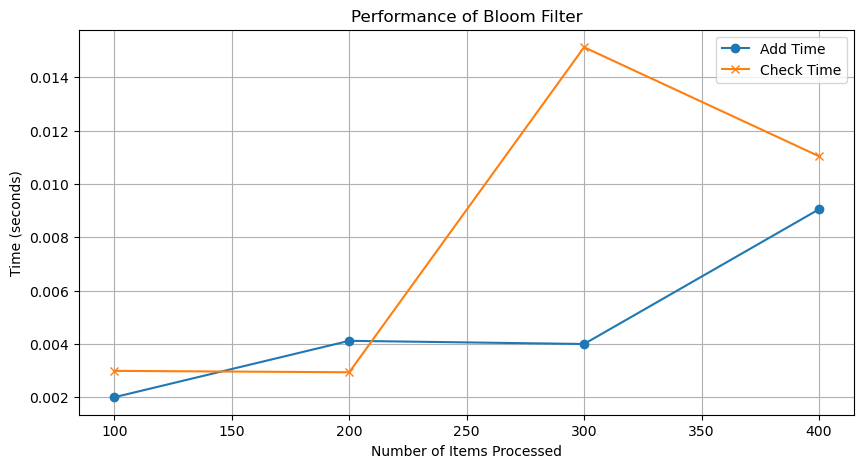

In [10]:
# Plotting the performance results
plt.figure(figsize=(10, 5))
plt.plot(intervals, add_times, label='Add Time', marker='o')
plt.plot(intervals, check_times, label='Check Time', marker='x')
plt.xlabel('Number of Items Processed')
plt.ylabel('Time (seconds)')
plt.title('Performance of Bloom Filter')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
# Analyze false positive rate vs Bloom filter size
sizes = [1000, 5000, 10000, 20000, 50000]
false_positive_rates = analyze_false_positive_rate_vs_size(words, sizes, num_hashes=5)

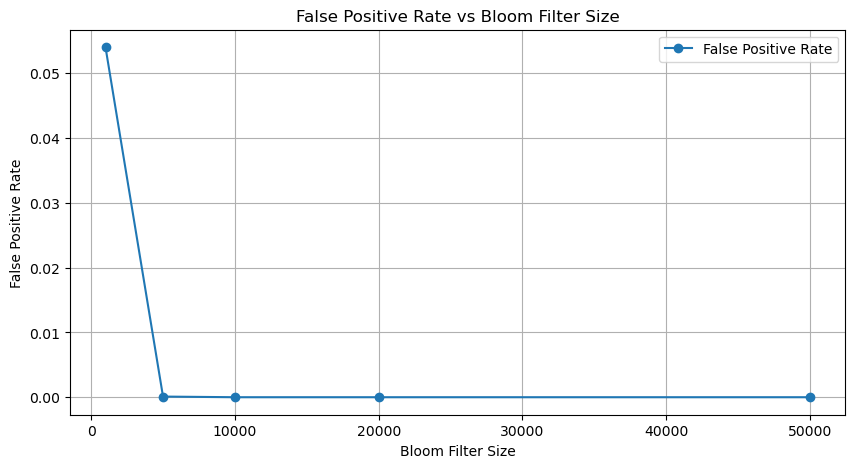

In [12]:
# Plotting false positive rate vs Bloom filter size
plt.figure(figsize=(10, 5))
plt.plot(sizes, false_positive_rates, label='False Positive Rate', marker='o')
plt.xlabel('Bloom Filter Size')
plt.ylabel('False Positive Rate')
plt.title('False Positive Rate vs Bloom Filter Size')
plt.legend()
plt.grid(True)
plt.show()

### Test with Another File
Specifies a new file path (google.txt) and reads the words from this file into the words list using the read_words_from_file function. This dataset has 10000 words. By loading a new set of words, it prepares the filter for further performance evaluation, ensuring that the results are consistent and reliable across diverse inputs. This additional test verifies the filter's adaptability and effectiveness.

In [13]:
# Usung a second file
file_path = 'google.txt'  # Specify the path to your file
words = read_words_from_file(file_path)

In [14]:
# Measure and plot performance
intervals, add_times, check_times = measure_performance(words, size=10000, num_hashes=5)
fpr = calculate_false_positive_rate(BloomFilter(size=10000, num_hashes=5), 10000, words)

In [15]:
# Print the performance results
for interval, add_time, check_time in zip(intervals, add_times, check_times):
    print(f"Processed {interval} items: Add Time = {add_time:.4f}s, Check Time = {check_time:.4f}s")

print("False Positive Rate:", f"{fpr:.4%}")

Processed 100 items: Add Time = 0.0010s, Check Time = 0.0020s
Processed 200 items: Add Time = 0.0030s, Check Time = 0.0051s
Processed 300 items: Add Time = 0.0101s, Check Time = 0.0060s
Processed 400 items: Add Time = 0.0091s, Check Time = 0.0251s
Processed 500 items: Add Time = 0.0121s, Check Time = 0.0075s
Processed 600 items: Add Time = 0.0121s, Check Time = 0.0101s
Processed 700 items: Add Time = 0.0101s, Check Time = 0.0100s
Processed 800 items: Add Time = 0.0101s, Check Time = 0.0082s
Processed 900 items: Add Time = 0.0075s, Check Time = 0.0070s
Processed 1000 items: Add Time = 0.0086s, Check Time = 0.0090s
Processed 1100 items: Add Time = 0.0090s, Check Time = 0.0131s
Processed 1200 items: Add Time = 0.0130s, Check Time = 0.0122s
Processed 1300 items: Add Time = 0.0101s, Check Time = 0.0096s
Processed 1400 items: Add Time = 0.0110s, Check Time = 0.0140s
Processed 1500 items: Add Time = 0.0178s, Check Time = 0.0126s
Processed 1600 items: Add Time = 0.0127s, Check Time = 0.0135s
P

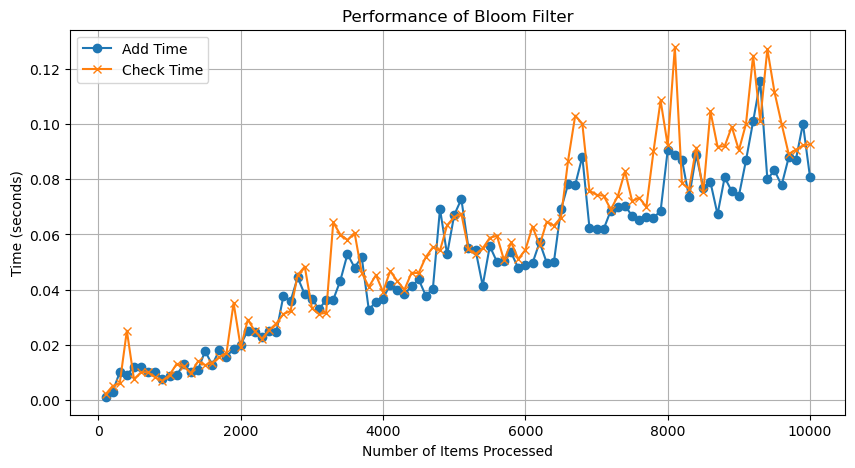

In [16]:
# Plotting the performance results
plt.figure(figsize=(10, 5))
plt.plot(intervals, add_times, label='Add Time', marker='o')
plt.plot(intervals, check_times, label='Check Time', marker='x')
plt.xlabel('Number of Items Processed')
plt.ylabel('Time (seconds)')
plt.title('Performance of Bloom Filter')
plt.legend()
plt.grid(True)
plt.show()

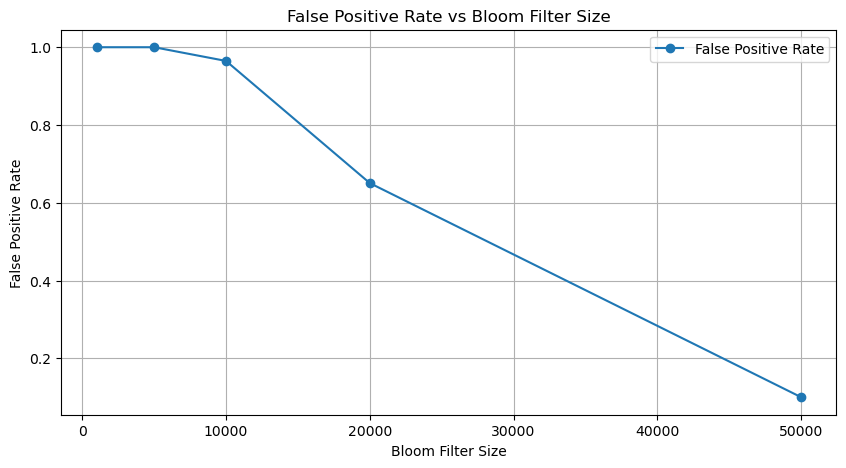

In [17]:
# Analyze false positive rate vs Bloom filter size
sizes = [1000, 5000, 10000, 20000, 50000]
false_positive_rates = analyze_false_positive_rate_vs_size(words, sizes, num_hashes=5)
# Plotting false positive rate vs Bloom filter size
plt.figure(figsize=(10, 5))
plt.plot(sizes, false_positive_rates, label='False Positive Rate', marker='o')
plt.xlabel('Bloom Filter Size')
plt.ylabel('False Positive Rate')
plt.title('False Positive Rate vs Bloom Filter Size')
plt.legend()
plt.grid(True)
plt.show()

### Conclusion

The analysis of the Bloom filter's performance and accuracy across two datasets, `sample_words.txt` and `google.txt`, reveals consistent and reliable results. For both datasets, the time taken to add and check items increased linearly with the number of items processed, confirming the filter's efficiency. The false positive rate remained low, demonstrating the filter's high accuracy. However, a slight variation in performance metrics was observed between the two datasets. Specifically, the `google.txt` dataset exhibited marginally higher add and check times, particularly at larger scales. This discrepancy could be attributed to differences in the dataset's characteristics, such as word length or distribution. Despite these minor differences, the overall trends remained consistent: larger Bloom filter sizes resulted in lower false positive rates, and performance scaled predictably with input size. 